# 패키지 임포트

In [1]:
import numpy
import pandas
import seaborn as sns
import wordcloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 화면 표시 방식 설정

In [2]:
%matplotlib inline
plt.rcParams['font.size'] = 20
plt.rcParams["figure.figsize"] = (50, 10)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True

In [3]:
%%html
<style>
    table { display: inline-block }
    .rendered_html td, .rendered_html th { text-align: left; }
</style>

# 샘플용 데이터 로딩

In [4]:
df = pandas.read_csv('Groceries_dataset.csv')
display(df)

,Member_number,Date,itemDescription
0,1000,15-03-2015,sausage
1,1000,15-03-2015,semi-finished bread
2,1000,15-03-2015,whole milk
3,1000,15-03-2015,yogurt
4,1000,24-06-2014,pastry
...,...,...,...
38760,5000,10-02-2015,root vegetables
38761,5000,10-02-2015,semi-finished bread
38762,5000,10-02-2015,soda
38763,5000,16-11-2014,bottled beer


# Pie Chart

(13, 1) (4, 1) (4, 1)


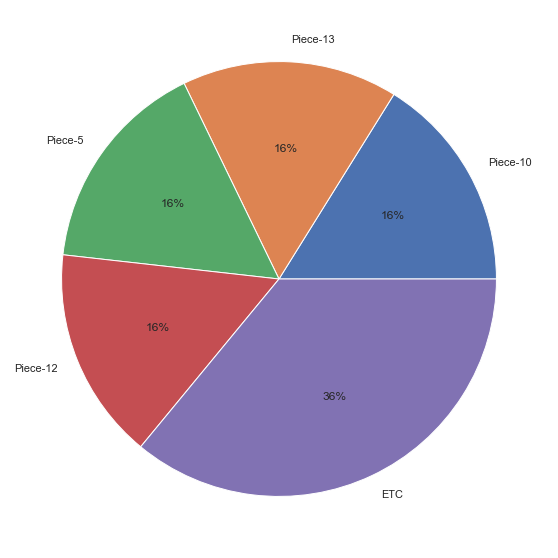

In [5]:
df['key'] = df['Member_number'] / 350
df['key'] = df['key'].astype(int)
df['key'] = df['key'].astype(str)
df['key'] = 'Piece-' + df['key']
df_pie = df.groupby(['key']).agg( CNT = ('itemDescription', 'count'))
df_pie = df_pie.sort_values(by='CNT', ascending=False)
df_pie_top = df_pie.head(4)
df_pie_oth = df_pie.tail(df_pie.shape[0] - 9)
print(df_pie.shape, df_pie_top.shape, df_pie_oth.shape)
# display(df_pie)

list_labels = df_pie_top.index.tolist()
list_labels.append('ETC')

list_data = df_pie_top['CNT'].tolist()
list_data.append(numpy.sum(df_pie_oth['CNT']))

sns.set(style='darkgrid')

colors = sns.color_palette('spring')[0:10]
# plt.pie(list_data, labels=list_labels, colors=colors, autopct='%.0f%%')
plt.pie(list_data, labels=list_labels, autopct='%.0f%%')
plt.show()


# Bar chart

(13, 1) (9, 1) (4, 1)


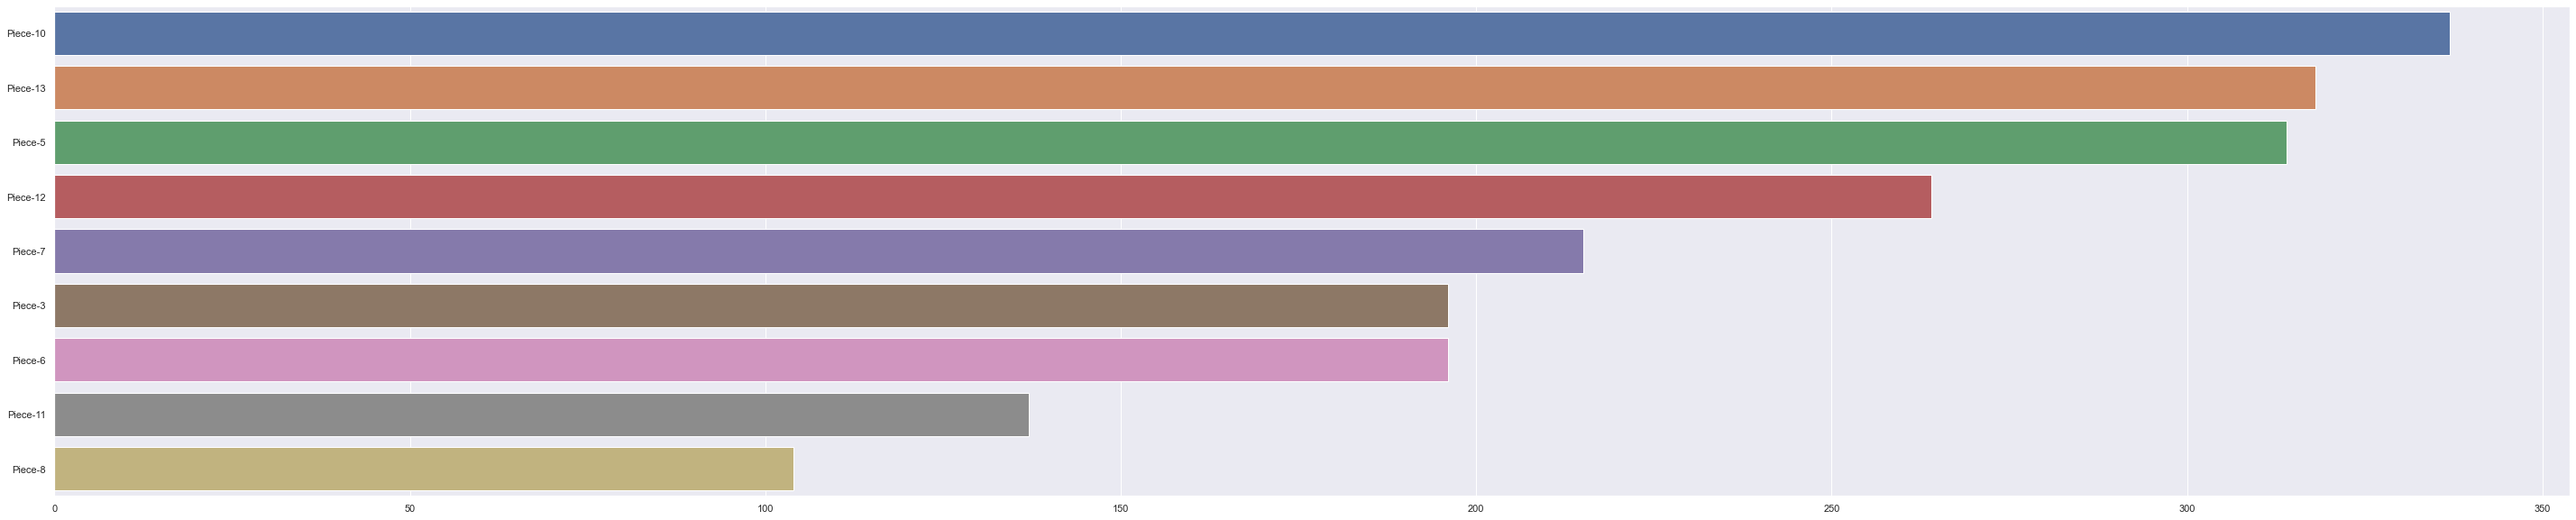

In [6]:
df['key'] = df['Member_number'] / 350
df['key'] = df['key'].astype(int)
df['key'] = df['key'].astype(str)
df['key'] = 'Piece-' + df['key']
df_pie = df.groupby(['key']).agg( CNT = ('itemDescription', 'count'))
df_pie = df_pie.sort_values(by='CNT', ascending=False)
df_pie['CNT'] = df_pie['CNT'] - 3200
df_pie_top = df_pie.head(9)
df_pie_oth = df_pie.tail(df_pie.shape[0] - 9)
print(df_pie.shape, df_pie_top.shape, df_pie_oth.shape)
# display(df_pie)

list_labels = df_pie_top.index.tolist()
# list_labels.append('ETC')

list_data = df_pie_top['CNT'].tolist()
# list_data.append(numpy.sum(df_pie_oth['CNT']))

sns.set(style='darkgrid')

ax = sns.barplot(x=list_data, y=list_labels)

plt.show()


# Column chart

(13, 1) (9, 1) (4, 1)


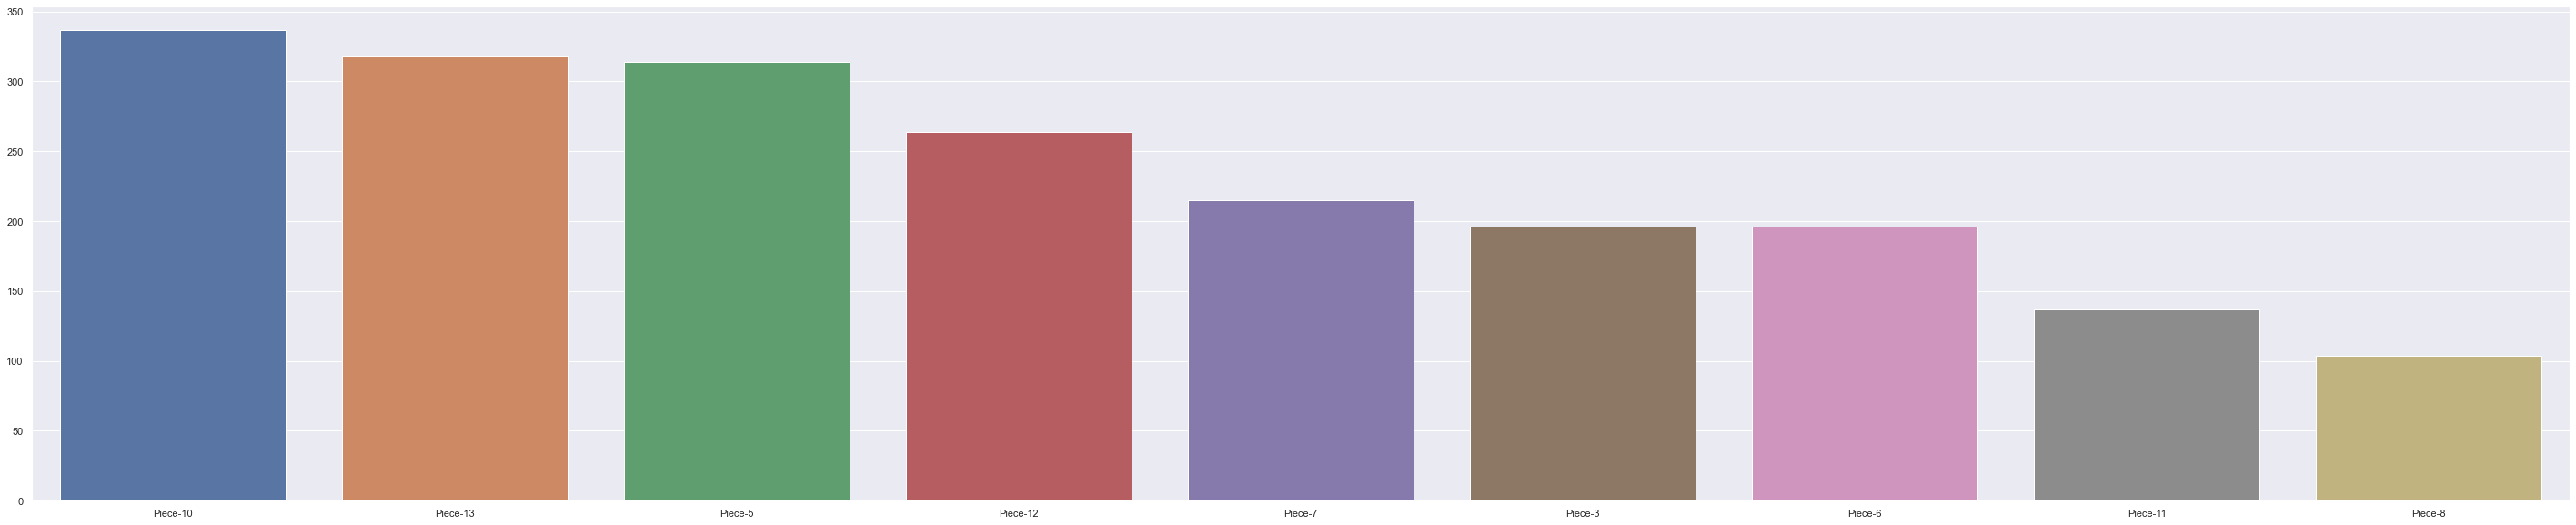

In [7]:
df['key'] = df['Member_number'] / 350
df['key'] = df['key'].astype(int)
df['key'] = df['key'].astype(str)
df['key'] = 'Piece-' + df['key']
df_pie = df.groupby(['key']).agg( CNT = ('itemDescription', 'count'))
df_pie = df_pie.sort_values(by='CNT', ascending=False)
df_pie['CNT'] = df_pie['CNT'] - 3200
df_pie_top = df_pie.head(9)
df_pie_oth = df_pie.tail(df_pie.shape[0] - 9)
print(df_pie.shape, df_pie_top.shape, df_pie_oth.shape)
# display(df_pie)

list_labels = df_pie_top.index.tolist()
# list_labels.append('ETC')

list_data = df_pie_top['CNT'].tolist()
# list_data.append(numpy.sum(df_pie_oth['CNT']))

sns.set(style='darkgrid')
ax = sns.barplot(y=list_data, x=list_labels)

plt.show()


# Line chart

(13, 1) (9, 1) (4, 1)


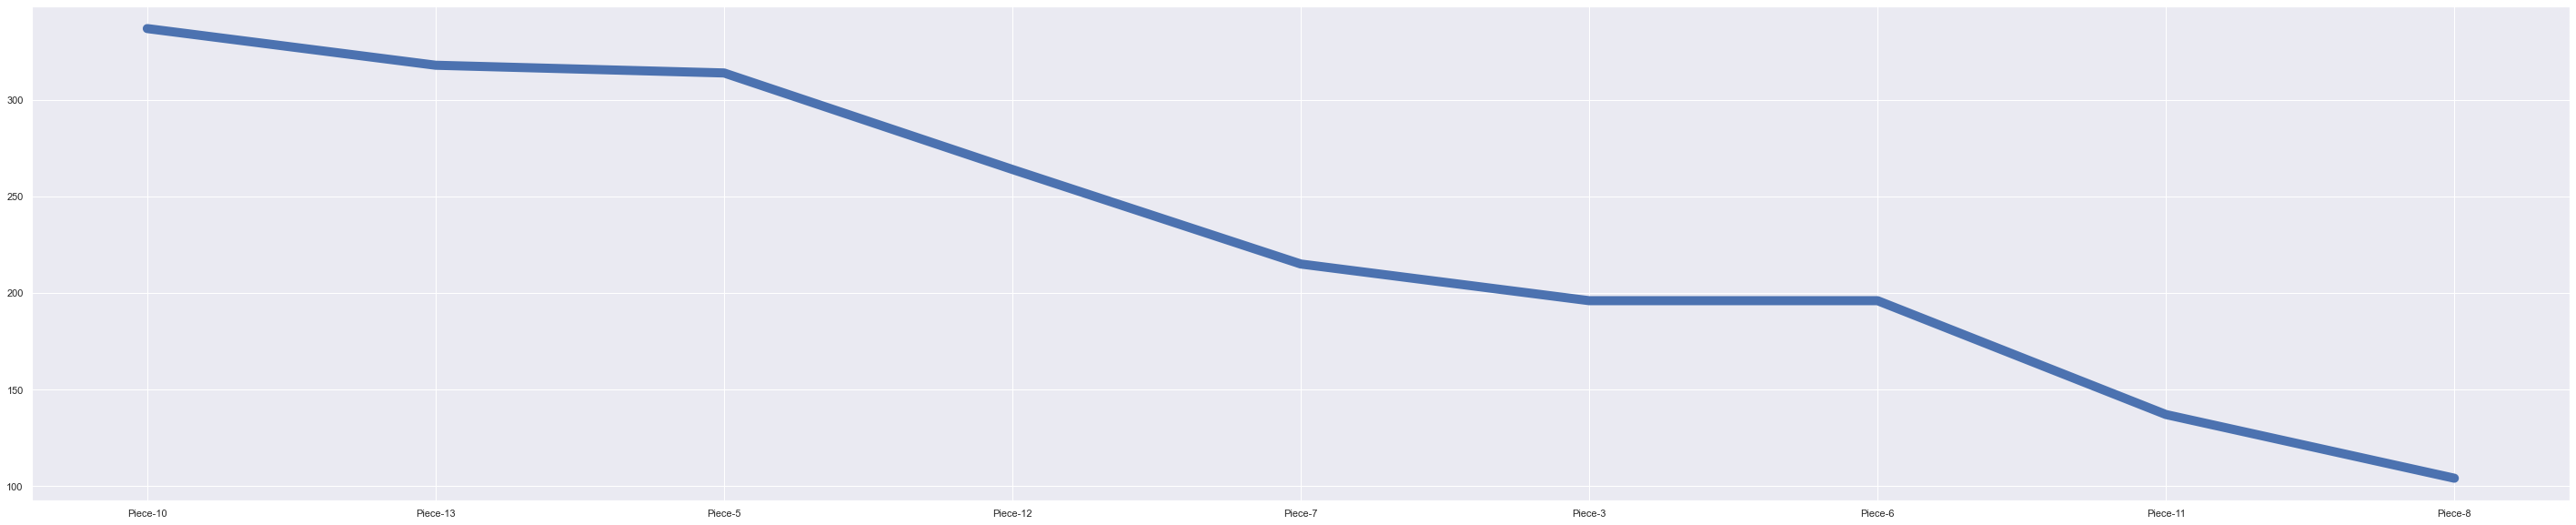

In [8]:
df['key'] = df['Member_number'] / 350
df['key'] = df['key'].astype(int)
df['key'] = df['key'].astype(str)
df['key'] = 'Piece-' + df['key']
df_pie = df.groupby(['key']).agg( CNT = ('itemDescription', 'count'))
df_pie = df_pie.sort_values(by='CNT', ascending=False)
df_pie['CNT'] = df_pie['CNT'] - 3200
df_pie_top = df_pie.head(9)
df_pie_oth = df_pie.tail(df_pie.shape[0] - 9)
print(df_pie.shape, df_pie_top.shape, df_pie_oth.shape)
# display(df_pie)

list_labels = df_pie_top.index.tolist()
# list_labels.append('ETC')

list_data = df_pie_top['CNT'].tolist()
# list_data.append(numpy.sum(df_pie_oth['CNT']))

sns.set(style='darkgrid')

plt.rcParams['lines.linewidth'] = 10
ax = sns.lineplot(y=list_data, x=list_labels)

plt.show()


# Area chart

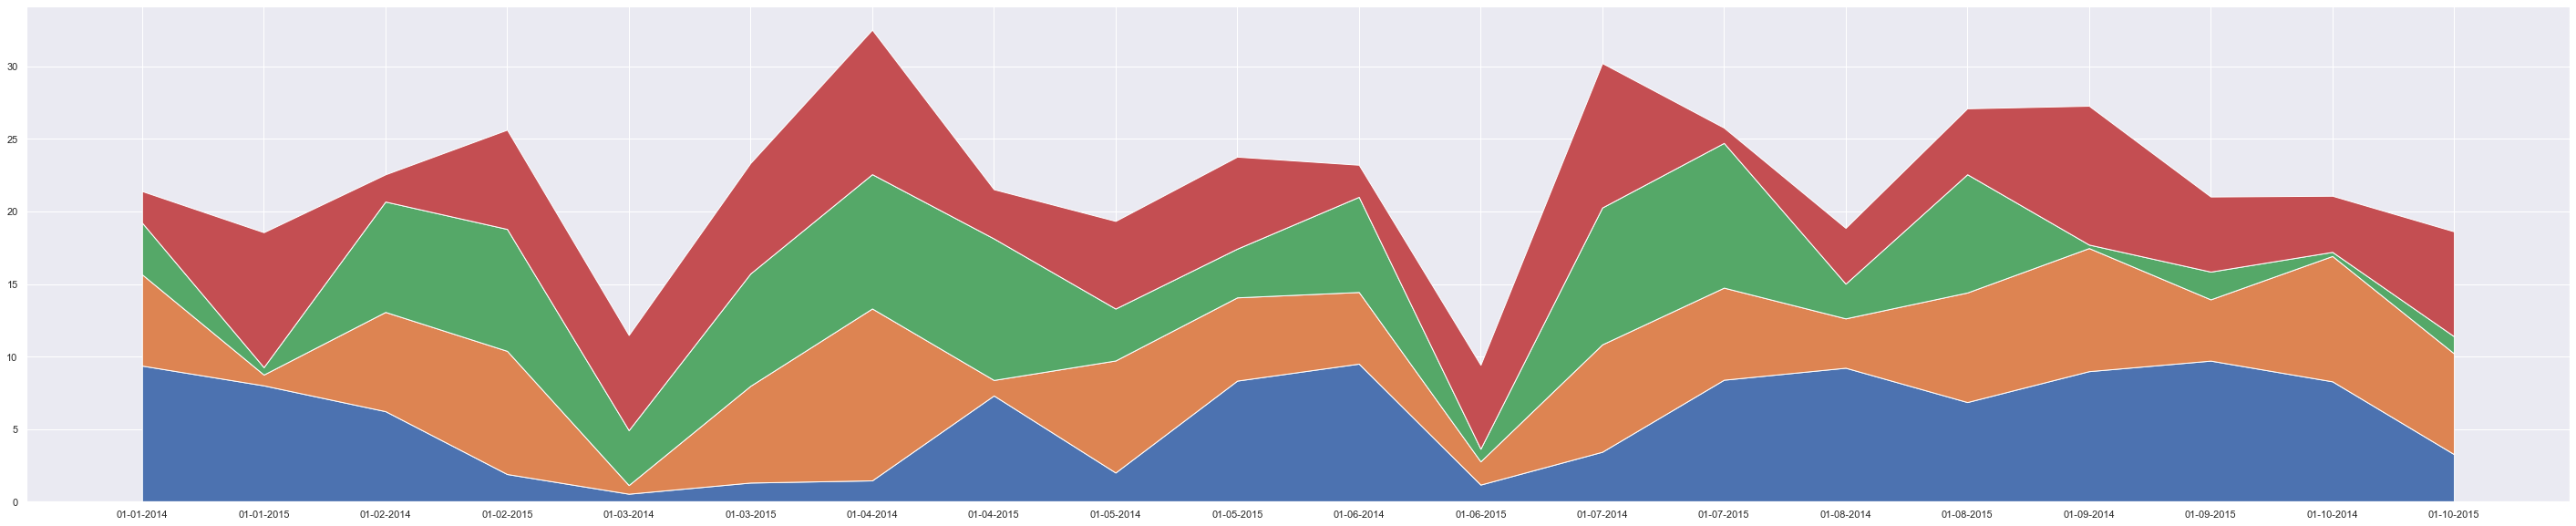

In [9]:
df['key'] = df['Member_number'] / 20
df['key'] = df['key'].astype(int)
df['key'] = df['key'].astype(str)
df['key'] = 'Piece-' + df['key']
df_groupby = df.groupby(['Date', 'key']).agg( CNT = ('itemDescription', 'count'))
df_groupby = df_groupby.sort_values(by='CNT', ascending=False)

df_transpose = pandas.pivot_table(df_groupby, values='CNT', index=['Date'], columns=['key'], aggfunc=numpy.sum, fill_value=0)
df_transpose.columns = ['PV-' + str(col) for col in df_transpose.columns.values]
df_transpose = df_transpose.reset_index()
# display(df_transpose)
df_transpose = df_transpose.set_index(['Date'])
df_transpose['PV-Piece-80'] = df_transpose['PV-Piece-80'] + numpy.random.rand(df_transpose.shape[0]) * 10
df_transpose['PV-Piece-90'] = df_transpose['PV-Piece-90'] + numpy.random.rand(df_transpose.shape[0]) * 10
df_transpose['PV-Piece-70'] = df_transpose['PV-Piece-70'] + numpy.random.rand(df_transpose.shape[0]) * 10
df_transpose['PV-Piece-60'] = df_transpose['PV-Piece-60'] + numpy.random.rand(df_transpose.shape[0]) * 10
df_transpose = df_transpose.head(20)

sns.set(style='darkgrid')

plt.rcParams['lines.linewidth'] = 10
plt.stackplot(df_transpose.index, df_transpose['PV-Piece-90'], df_transpose['PV-Piece-80'], df_transpose['PV-Piece-70'], df_transpose['PV-Piece-60'])

plt.show()


# Scatter chart

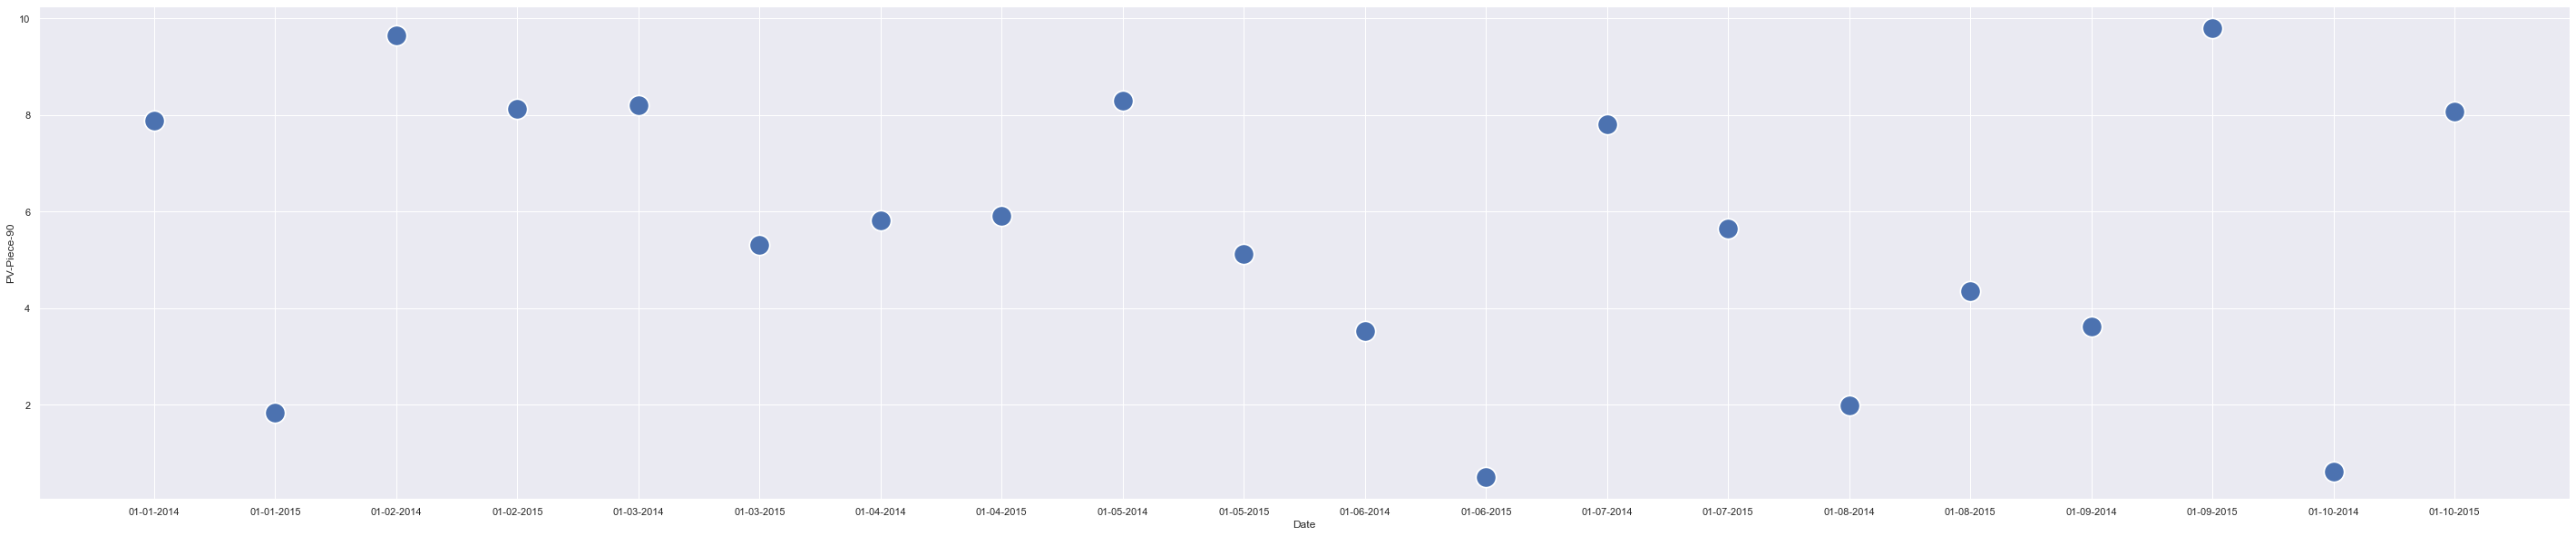

In [10]:
df['key'] = df['Member_number'] / 20
df['key'] = df['key'].astype(int)
df['key'] = df['key'].astype(str)
df['key'] = 'Piece-' + df['key']
df_groupby = df.groupby(['Date', 'key']).agg( CNT = ('itemDescription', 'count'))
df_groupby = df_groupby.sort_values(by='CNT', ascending=False)

df_transpose = pandas.pivot_table(df_groupby, values='CNT', index=['Date'], columns=['key'], aggfunc=numpy.sum, fill_value=0)
df_transpose.columns = ['PV-' + str(col) for col in df_transpose.columns.values]
df_transpose = df_transpose.reset_index()
# display(df_transpose)
df_transpose = df_transpose.set_index(['Date'])
df_transpose['PV-Piece-80'] = df_transpose['PV-Piece-80'] + numpy.random.rand(df_transpose.shape[0]) * 10
df_transpose['PV-Piece-90'] = df_transpose['PV-Piece-90'] + numpy.random.rand(df_transpose.shape[0]) * 10
df_transpose['PV-Piece-70'] = df_transpose['PV-Piece-70'] + numpy.random.rand(df_transpose.shape[0]) * 10
df_transpose['PV-Piece-60'] = df_transpose['PV-Piece-60'] + numpy.random.rand(df_transpose.shape[0]) * 10
df_transpose = df_transpose.head(20)

sns.set(style='darkgrid')

sns.set(style='darkgrid')
ax = sns.scatterplot(x=df_transpose.index, y=df_transpose['PV-Piece-90'], s=500)

plt.show()


# Secondary Axis

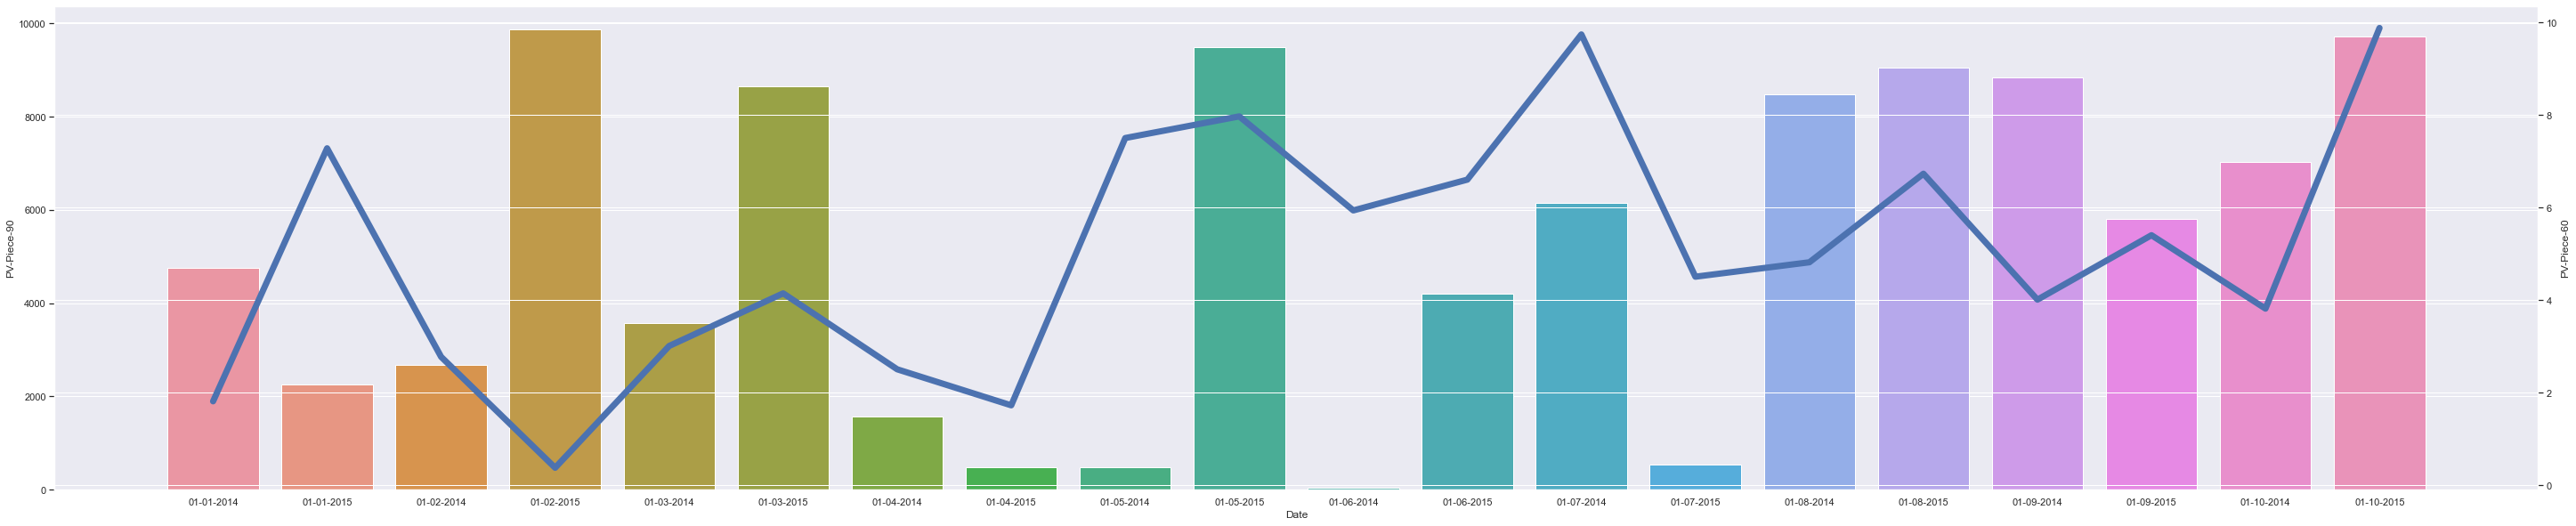

In [11]:
df['key'] = df['Member_number'] / 20
df['key'] = df['key'].astype(int)
df['key'] = df['key'].astype(str)
df['key'] = 'Piece-' + df['key']
df_groupby = df.groupby(['Date', 'key']).agg( CNT = ('itemDescription', 'count'))
df_groupby = df_groupby.sort_values(by='CNT', ascending=False)

df_transpose = pandas.pivot_table(df_groupby, values='CNT', index=['Date'], columns=['key'], aggfunc=numpy.sum, fill_value=0)
df_transpose.columns = ['PV-' + str(col) for col in df_transpose.columns.values]
df_transpose = df_transpose.reset_index()
# display(df_transpose)
df_transpose = df_transpose.set_index(['Date'])
df_transpose['PV-Piece-80'] = df_transpose['PV-Piece-80'] + numpy.random.rand(df_transpose.shape[0]) * 10
df_transpose['PV-Piece-90'] = df_transpose['PV-Piece-90'] + numpy.random.rand(df_transpose.shape[0]) * 10000
df_transpose['PV-Piece-70'] = df_transpose['PV-Piece-70'] + numpy.random.rand(df_transpose.shape[0]) * 10
df_transpose['PV-Piece-60'] = df_transpose['PV-Piece-60'] + numpy.random.rand(df_transpose.shape[0]) * 10
df_transpose = df_transpose.head(20)

sns.set(style='darkgrid')

plt.rcParams['lines.linewidth'] = 7

ax = sns.barplot(x=df_transpose.index, y=df_transpose['PV-Piece-90'])
ax2 = plt.twinx()
ax = sns.lineplot(x=df_transpose.index, y=df_transpose['PV-Piece-60'], ax=ax2)

plt.show()


# Heatmap chart

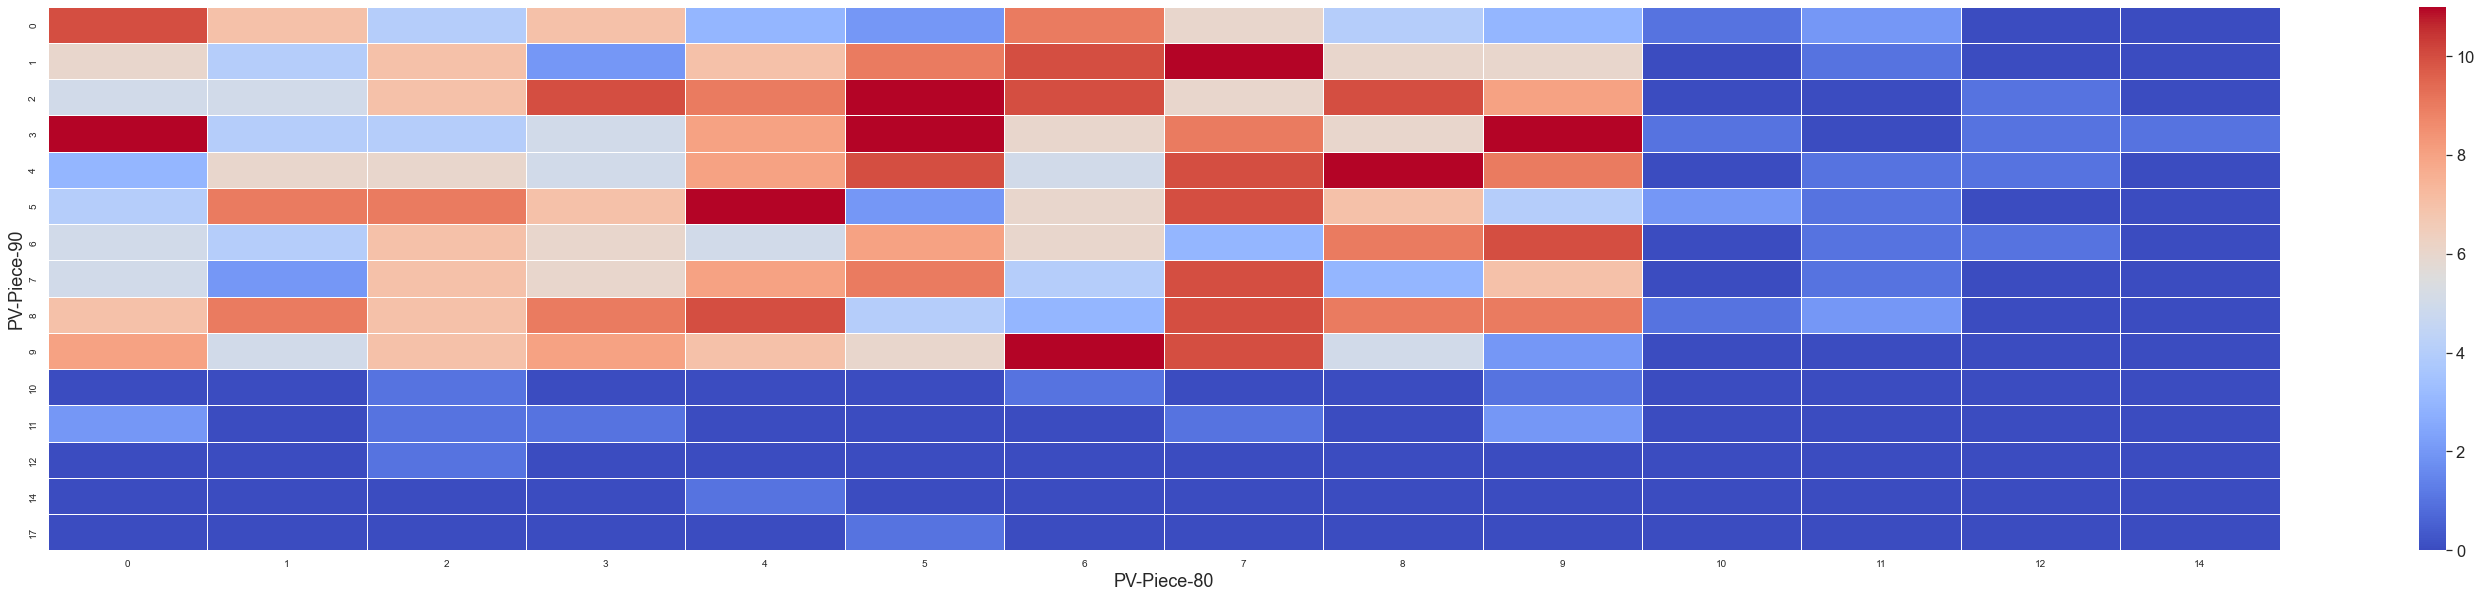

In [12]:
df['key'] = df['Member_number'] / 20
df['key'] = df['key'].astype(int)
df['key'] = df['key'].astype(str)
df['key'] = 'Piece-' + df['key']
df_groupby = df.groupby(['Date', 'key']).agg( CNT = ('itemDescription', 'count'))
df_groupby = df_groupby.sort_values(by='CNT', ascending=False)

df_transpose = pandas.pivot_table(df_groupby, values='CNT', index=['Date'], columns=['key'], aggfunc=numpy.sum, fill_value=0)
df_transpose.columns = ['PV-' + str(col) for col in df_transpose.columns.values]
df_transpose = df_transpose.reset_index()
df_transpose['PV-Piece-80'] = df_transpose['PV-Piece-80'] + numpy.random.rand(df_transpose.shape[0]) * 10
df_transpose['PV-Piece-90'] = df_transpose['PV-Piece-90'] + numpy.random.rand(df_transpose.shape[0]) * 10
df_transpose = df_transpose[['PV-Piece-80', 'PV-Piece-90']]
df_transpose = df_transpose.astype(int)
df_transpose['CNT'] = 1
df_chart = pandas.pivot_table(df_transpose, values='CNT', index=['PV-Piece-90'], columns=['PV-Piece-80'], aggfunc=numpy.sum, fill_value=0)
# display(df_chart)

sns.set(style='darkgrid')

plt.rcParams['lines.linewidth'] = 7

sns.set(font_scale=1.5)
heat_map = sns.heatmap(df_chart, annot=False, cmap='coolwarm', robust=True, fmt='.0f', linewidths=.5)
heat_map.tick_params(labelsize=10)

plt.show()


# Box plot

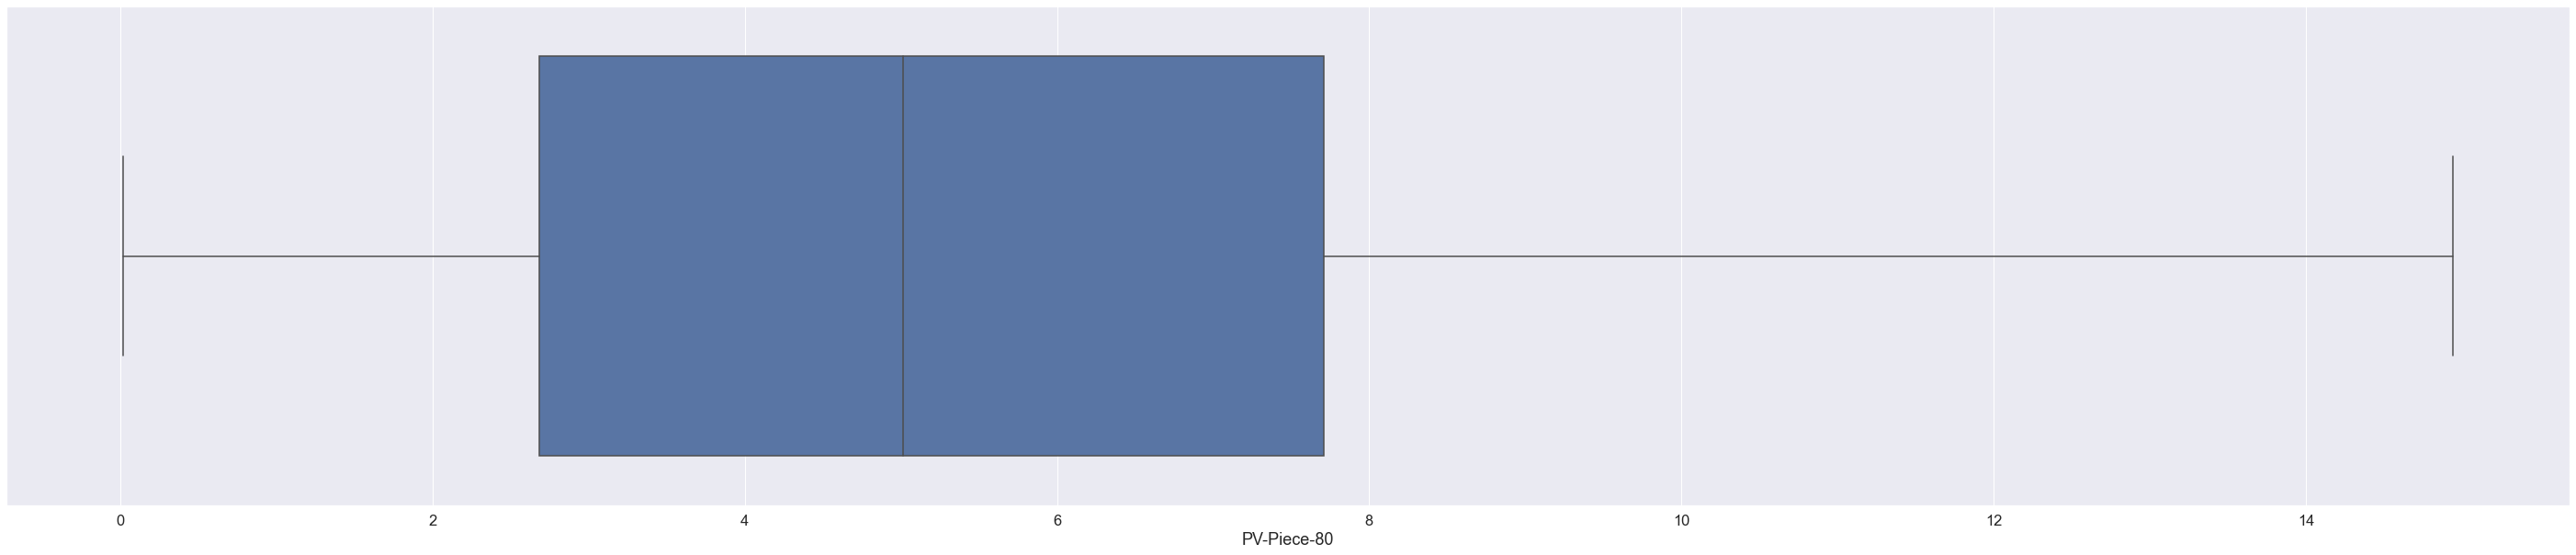

In [13]:
df['key'] = df['Member_number'] / 20
df['key'] = df['key'].astype(int)
df['key'] = df['key'].astype(str)
df['key'] = 'Piece-' + df['key']
df_groupby = df.groupby(['Date', 'key']).agg( CNT = ('itemDescription', 'count'))
df_groupby = df_groupby.sort_values(by='CNT', ascending=False)

df_transpose = pandas.pivot_table(df_groupby, values='CNT', index=['Date'], columns=['key'], aggfunc=numpy.sum, fill_value=0)
df_transpose.columns = ['PV-' + str(col) for col in df_transpose.columns.values]
df_transpose = df_transpose.reset_index()
df_transpose['PV-Piece-80'] = df_transpose['PV-Piece-80'] + numpy.random.rand(df_transpose.shape[0]) * 10
df_transpose = df_transpose[['PV-Piece-80']]
# display(df_transpose)

sns.set(style='darkgrid')
plt.rcParams['lines.linewidth'] = 7

sns.set(font_scale=1.5)
ax = sns.boxplot(x = "PV-Piece-80",  data = df_transpose)

plt.show()


# Word cloud

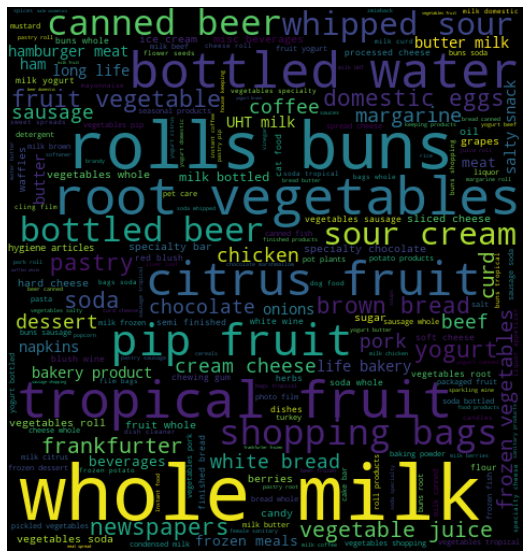

In [14]:
html = ' '.join(df['itemDescription'].tolist())
df['key'] = df['Member_number'] / 350
df['key'] = df['key'].astype(int)
df['key'] = df['key'].astype(str)
df['key'] = 'Piece-' + df['key']
df_pie = df.groupby(['key']).agg( CNT = ('itemDescription', 'count'))
df_pie = df_pie.sort_values(by='CNT', ascending=False)

sns.set(style='darkgrid')

wc = wordcloud.WordCloud(width=480, height=506).generate(html)
 
# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()